In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [2]:
end = datetime.now()
start = datetime(end.year - 15, end.month, end.day)

In [3]:
stock = 'NVDA'
stock_data = yf.download(stock, start = start, end = end)

/tmp/ipython-input-3-4270236607.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock, start = start, end = end)
[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2010-07-08,0.236340,0.245510,0.233360,0.245281,783272000
2010-07-09,0.237258,0.238862,0.234278,0.237487,571516000
2010-07-12,0.241613,0.244593,0.237028,0.237257,565396000
2010-07-13,0.250324,0.251928,0.244135,0.245510,723316000
2010-07-14,0.252845,0.263161,0.249178,0.261327,1355664000


In [5]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-06-30,157.990005,158.660004,155.960007,158.399994,194580300
2025-07-01,153.300003,157.199997,151.490005,156.289993,213143600
2025-07-02,157.250000,157.600006,152.970001,152.979996,171224100
2025-07-03,159.339996,160.979996,157.770004,158.369995,143716100
2025-07-07,158.240005,159.309998,157.339996,158.199997,139794100


In [6]:
stock_data.shape

(3772, 5)

In [7]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,NVDA,3772.0,1.822276e+01,3.466858e+01,2.035601e-01,4.413217e-01,3.986561e+00,1.596244e+01,1.593400e+02
High,NVDA,3772.0,1.855363e+01,3.529925e+01,2.074571e-01,4.467381e-01,4.062836e+00,1.625768e+01,1.609800e+02
Low,NVDA,3772.0,1.785662e+01,3.397594e+01,1.982877e-01,4.355861e-01,3.918590e+00,1.555802e+01,1.577700e+02
Open,NVDA,3772.0,1.822003e+01,3.468185e+01,1.998923e-01,4.416666e-01,3.989785e+00,1.595504e+01,1.584000e+02
Volume,NVDA,3772.0,4.816338e+08,3.021485e+08,4.564400e+07,2.933710e+08,4.119400e+08,5.812750e+08,3.692928e+09


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3772 entries, 2010-07-08 to 2025-07-07
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   3772 non-null   float64
 1   (High, NVDA)    3772 non-null   float64
 2   (Low, NVDA)     3772 non-null   float64
 3   (Open, NVDA)    3772 non-null   float64
 4   (Volume, NVDA)  3772 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.8 KB


In [9]:
#close price data
closing_data = stock_data[['Close']]

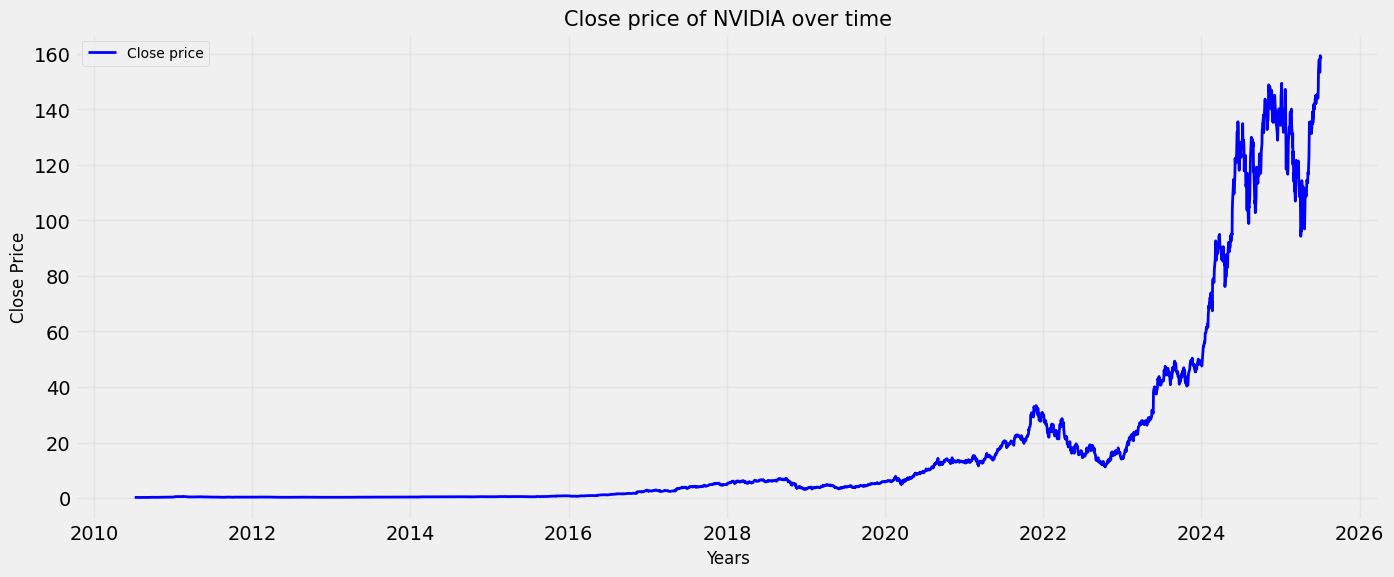

In [10]:
#plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_data.index, closing_data['Close'], label = "Close price", color = "blue", linewidth = 2)
plt.title("Close price of NVIDIA over time", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Close price", fontsize = 15)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Close Price", fontsize = 12)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 10)
plt.show()

In [11]:
#Moving average
for i in range(2010, 2025):
  print(i, list(stock_data.index.year).count(i))

2010 124
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [12]:
closing_data['MA_253'] = closing_data["Close"].rolling(window = 253).mean()
closing_data['MA_124'] = closing_data["Close"].rolling(window = 124).mean()

/tmp/ipython-input-12-1006574858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_data['MA_253'] = closing_data["Close"].rolling(window = 253).mean()
/tmp/ipython-input-12-1006574858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_data['MA_124'] = closing_data["Close"].rolling(window = 124).mean()


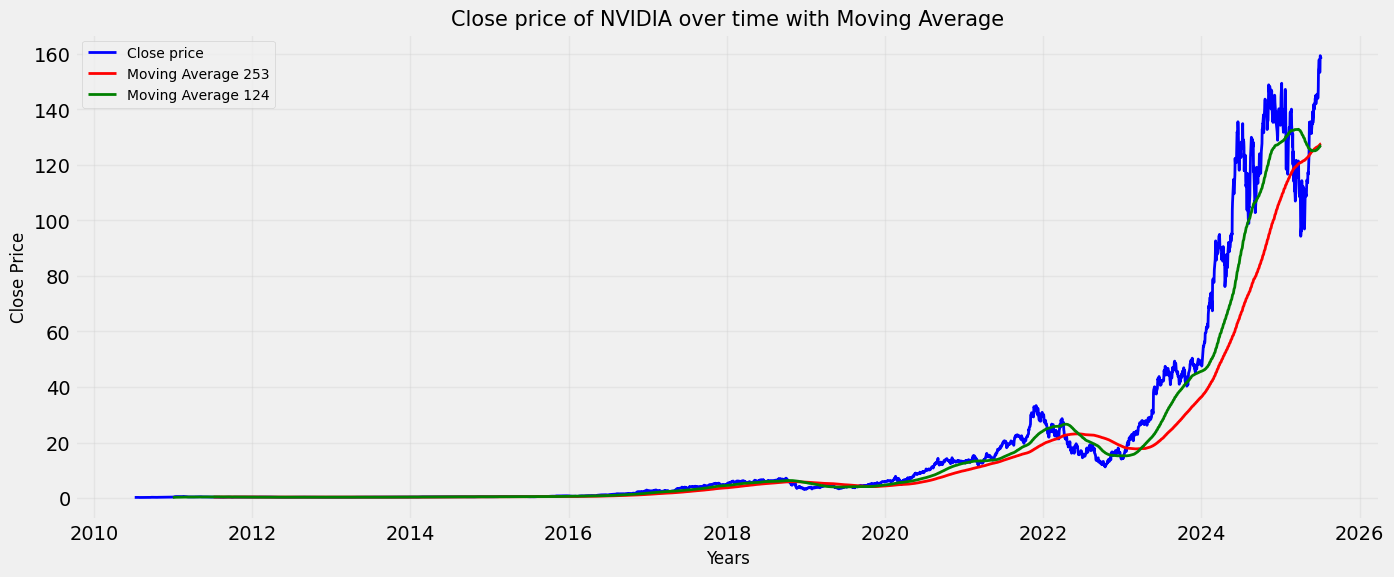

In [13]:
#plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_data.index, closing_data['Close'], label = "Close price", color = "blue", linewidth = 2)
plt.plot(closing_data.index, closing_data['MA_253'], label = "Moving Average 253", color = "red", linewidth = 2)
plt.plot(closing_data.index, closing_data['MA_124'], label = "Moving Average 124", color = "green", linewidth = 2)
plt.title("Close price of NVIDIA over time with Moving Average", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Close price", fontsize = 15)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Close Price", fontsize = 12)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 10)
plt.show()

In [14]:
#LSTM - Long Short Term Memory
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(closing_data[['Close']].dropna())

In [15]:
scaled_data

array([[2.05989243e-04],
       [2.11751984e-04],
       [2.39120582e-04],
       ...,
       [9.86866639e-01],
       [1.00000000e+00],
       [9.93087750e-01]])

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [17]:
X = []
y = []
base_days = 124
for i in range(base_days, len(scaled_data)):
  X.append(scaled_data[i - base_days : i])
  y.append(scaled_data[i])
X_data = np.array(X)
y_data = np.array(y)

In [18]:
X_data, y_data

(array([[[2.05989243e-04],
         [2.11751984e-04],
         [2.39120582e-04],
         ...,
         [8.72935732e-04],
         [8.80137966e-04],
         [9.39199349e-04]],
 
        [[2.11751984e-04],
         [2.39120582e-04],
         [2.93859558e-04],
         ...,
         [8.80137966e-04],
         [9.39199349e-04],
         [9.99698444e-04]],
 
        [[2.39120582e-04],
         [2.93859558e-04],
         [3.09704359e-04],
         ...,
         [9.39199349e-04],
         [9.99698444e-04],
         [9.92496960e-04]],
 
        ...,
 
        [[8.42451728e-01],
         [8.67708974e-01],
         [9.06411687e-01],
         ...,
         [9.90008597e-01],
         [9.91516771e-01],
         [9.62045189e-01]],
 
        [[8.67708974e-01],
         [9.06411687e-01],
         [9.37574775e-01],
         ...,
         [9.91516771e-01],
         [9.62045189e-01],
         [9.86866639e-01]],
 
        [[9.06411687e-01],
         [9.37574775e-01],
         [8.79206634e-01],
         

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.1, random_state = 42)

In [20]:
model = Sequential([
    LSTM(128, return_sequences= True, input_shape = (X_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(25),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 124, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train, y_train, batch_size = 5, epochs = 8)

Epoch 1/8
657/657 ━━━━━━━━━━━━━━━━━━━━ 74s 112ms/step - loss: 5.1357e-04
Epoch 2/8
657/657 ━━━━━━━━━━━━━━━━━━━━ 74s 113ms/step - loss: 2.8717e-04
Epoch 3/8
657/657 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - loss: 2.3395e-04
Epoch 4/8
657/657 ━━━━━━━━━━━━━━━━━━━━ 83s 114ms/step - loss: 4.2194e-04
Epoch 5/8
657/657 ━━━━━━━━━━━━━━━━━━━━ 74s 113ms/step - loss: 2.2211e-04
Epoch 6/8
657/657 ━━━━━━━━━━━━━━━━━━━━ 83s 114ms/step - loss: 1.5457e-04
Epoch 7/8
657/657 ━━━━━━━━━━━━━━━━━━━━ 82s 114ms/step - loss: 2.6163e-04
Epoch 8/8
657/657 ━━━━━━━━━━━━━━━━━━━━ 81s 113ms/step - loss: 1.6816e-04


In [25]:
predictions = model.predict(X_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test =  scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


In [26]:
inv_predictions

array([[  1.4813858 ],
       [ 93.7041    ],
       [142.87961   ],
       [ 39.46593   ],
       [ 27.97188   ],
       [  2.624456  ],
       [  2.4844282 ],
       [ 44.975857  ],
       [  2.5891955 ],
       [  3.511523  ],
       [ 11.244485  ],
       [ 13.770023  ],
       [ 89.88388   ],
       [  5.386147  ],
       [  0.52274746],
       [  0.58573675],
       [ 17.656174  ],
       [  6.521625  ],
       [ 37.01312   ],
       [  0.67372334],
       [  9.117166  ],
       [  0.4938817 ],
       [  5.6842465 ],
       [  0.56068057],
       [  0.58817923],
       [  0.48688188],
       [  0.85990024],
       [  0.58491987],
       [  0.67686033],
       [  0.5045494 ],
       [  0.6988282 ],
       [  0.650207  ],
       [  0.6150667 ],
       [  6.441472  ],
       [ 83.43801   ],
       [ 39.09474   ],
       [ 13.707458  ],
       [  0.6264188 ],
       [  0.935331  ],
       [146.27682   ],
       [  3.60891   ],
       [  0.44725388],
       [ 19.534008  ],
       [  0

In [27]:
inv_y_test

array([[  1.40486884],
       [102.7028656 ],
       [157.25      ],
       [ 42.30245972],
       [ 30.15631866],
       [  2.57089972],
       [  2.35487032],
       [ 45.49199677],
       [  2.64228821],
       [  3.46705389],
       [ 11.48684692],
       [ 13.98283768],
       [ 92.44219208],
       [  5.53066349],
       [  0.36081484],
       [  0.43977195],
       [ 18.59924507],
       [  6.62349653],
       [ 38.62623215],
       [  0.52903837],
       [  9.49869347],
       [  0.33445281],
       [  5.47565556],
       [  0.40414006],
       [  0.44379789],
       [  0.34178829],
       [  0.73881191],
       [  0.43479878],
       [  0.58867347],
       [  0.34706077],
       [  0.56093633],
       [  0.51286972],
       [  0.46860379],
       [  6.29138231],
       [ 85.73986053],
       [ 41.85024643],
       [ 14.36618233],
       [  0.48714527],
       [  0.80357116],
       [157.75      ],
       [  3.6988852 ],
       [  0.29782104],
       [ 20.20707703],
       [  0

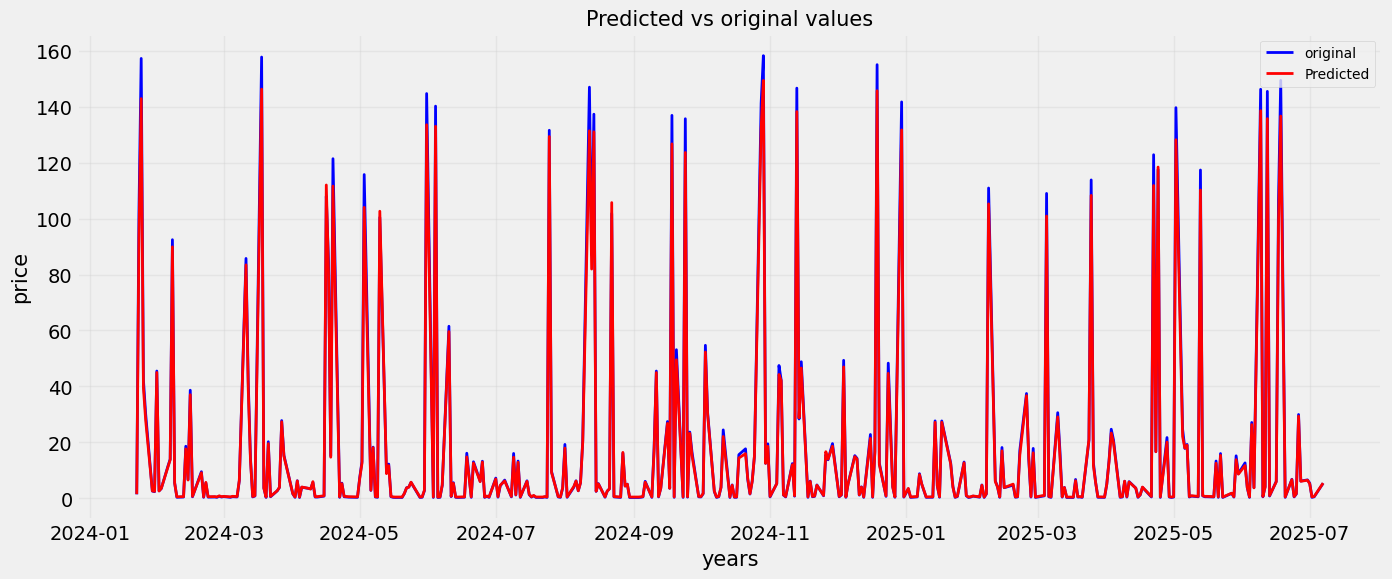

In [28]:
index_start = int(0.9 * len(X_data)) + base_days
plot_data = pd.DataFrame(
    {
        "original" : inv_y_test.flatten(),
        "prediction" : inv_predictions.flatten()
    }, index = closing_data.index[index_start :]
)
#plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(plot_data.index, plot_data['original'], label = "original", color = "blue", linewidth = 2)
plt.plot(plot_data.index, plot_data['prediction'], label = "Predicted", color = "red", linewidth = 2)
plt.title("Predicted vs original values", fontsize = 15)
plt.xlabel("years", fontsize = 15)
plt.ylabel("price", fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 10)
plt.show()

In [31]:
#predict future days
last_100 = scaled_data[-100 :].reshape(1, -1, 1)
future_predictions = []
for _ in range(10):
  next_days = model.predict(last_100)
  future_predictions.append(scaler.inverse_transform(next_days))
  last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [32]:
future_predictions

[array([[148.31401]], dtype=float32),
 array([[138.4088]], dtype=float32),
 array([[128.75127]], dtype=float32),
 array([[120.503784]], dtype=float32),
 array([[114.02188]], dtype=float32),
 array([[109.200516]], dtype=float32),
 array([[105.70375]], dtype=float32),
 array([[103.12531]], dtype=float32),
 array([[101.08536]], dtype=float32),
 array([[99.2806]], dtype=float32)]

In [36]:
future_predictions = np.array(future_predictions).flatten()

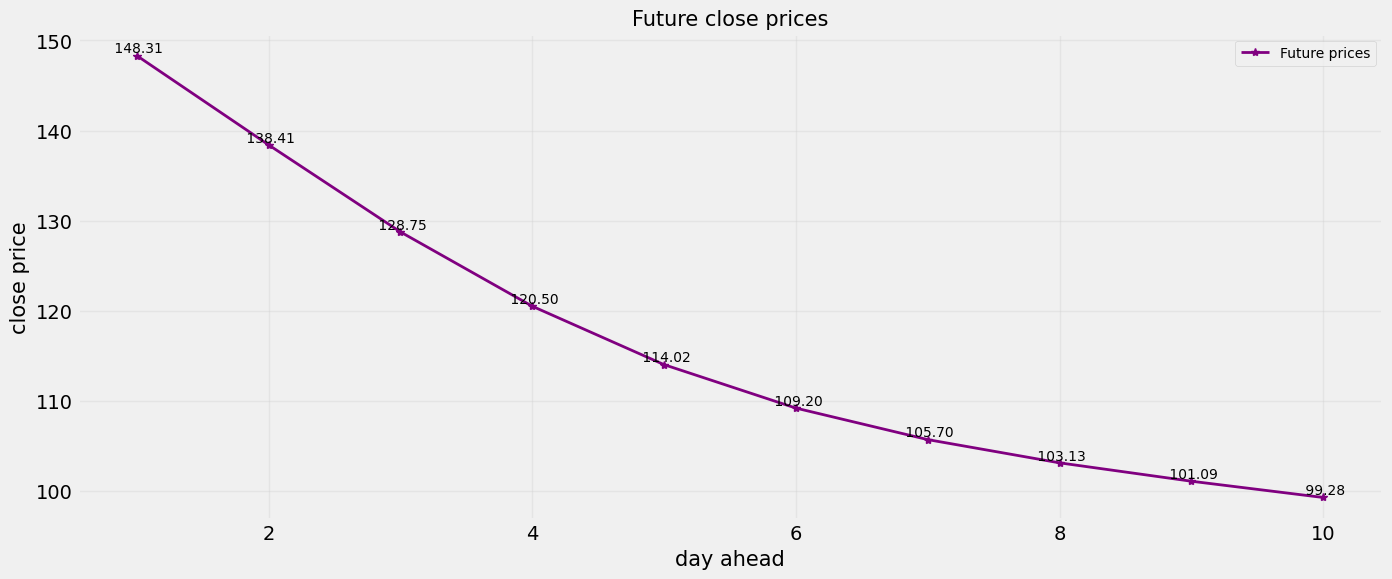

In [39]:
plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker = '*', label = "Future prices", color = "purple", linewidth = 2)
for i, val in enumerate(future_predictions):
  plt.text(i + 1, val, f'{val : .2f}', fontsize = 10, ha = 'center', va = 'bottom', color = 'black')
plt.title("Future close prices", fontsize = 15)
plt.xlabel("day ahead", fontsize = 15)
plt.ylabel("close price", fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 10)
plt.show()

In [40]:
model.save("model.keras")